In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az

az.style.use('arviz-darkgrid')

In [6]:
# read .csv file into Dataframe
data = pd.read_csv('../../data/juices/FTIR_juices.csv')
data.head(3)

,899.327,903.187,907.047,910.907,914.767,918.627,922.487,926.347,930.207,934.067,...,1771.684,1775.544,1779.404,1783.264,1787.124,1790.984,1794.844,1798.704,1802.564,label
0,0.002806,0.002732,0.002661,0.002657,0.002699,0.002762,0.002749,0.002686,0.002637,0.002617,...,0.000348,0.000216,0.000166,0.000117,0.000087,0.000046,0.000011,0.000009,0.000009,NON-Strawberry
1,0.002637,0.002638,0.002651,0.002757,0.003000,0.003313,0.003412,0.003302,0.003162,0.003060,...,0.000013,0.000006,-0.000005,-0.000005,-0.000006,0.000002,0.000010,0.000005,0.000005,NON-Strawberry
2,0.002416,0.002480,0.002511,0.002611,0.002802,0.003031,0.003235,0.003316,0.003257,0.003136,...,0.000290,0.000185,0.000137,0.000090,0.000062,0.000031,0.000009,0.000007,0.000007,NON-Strawberry


In [7]:
data.tail(3)

,899.327,903.187,907.047,910.907,914.767,918.627,922.487,926.347,930.207,934.067,...,1771.684,1775.544,1779.404,1783.264,1787.124,1790.984,1794.844,1798.704,1802.564,label
980,0.002713,0.002779,0.002877,0.003085,0.003419,0.003837,0.004176,0.004298,0.004191,0.003981,...,0.000084,0.000046,0.000028,0.000011,0.000007,0.000007,0.000012,0.000013,0.0,NON-Strawberry
981,0.002697,0.002905,0.003277,0.003711,0.004265,0.004993,0.005720,0.006136,0.006079,0.005719,...,-0.000035,-0.000030,-0.000018,-0.000017,-0.000009,-0.000005,-0.000002,0.000001,0.0,NON-Strawberry
982,0.002789,0.003040,0.003359,0.003796,0.004394,0.005098,0.005790,0.006222,0.006171,0.005773,...,-0.000014,-0.000020,-0.000020,-0.000023,-0.000020,-0.000006,-0.000005,-0.000002,0.0,NON-Strawberry


In [4]:
# get header values as x-axis values for plotting
cols = data.columns.to_list()
x_val = cols[:-2]

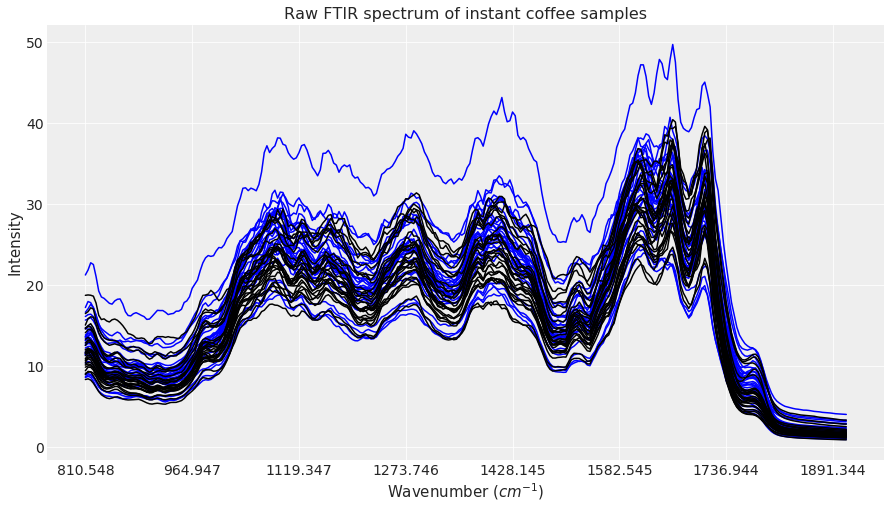

In [5]:
# plot all data in 1 figure
fig = plt.figure(figsize=(15,8))
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.set(title='Raw FTIR spectrum of instant coffee samples', 
       xlabel='Wavenumber ($cm^{-1}$)', ylabel='Intensity')

plt.rc('axes', labelsize=16)
plt.rc('axes', titlesize=18)

for i in range(len(data)):
    y = data.values[i]
    if y[-2] == 1:
        col = 'blue'
    else:
        col = 'black'
    y_val = y[:-2]
    plt.plot(x_val, y_val, color=col);

In [6]:
# number of Arabica samples
len(data[data.label == 'Arabica'])

29

In [7]:
# number of Robusta samples
len(data[data.label == 'Robusta'])

27

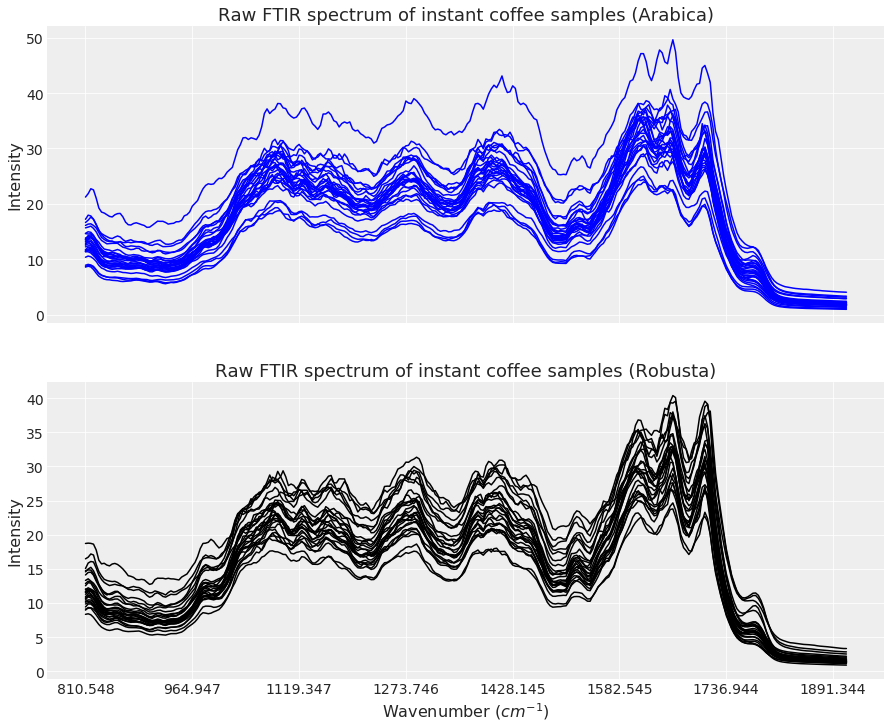

In [8]:
# plot raw samples
fig, ax = plt.subplots(2, 1, sharex='col', sharey = 'row', figsize=(15,12))
ax[0].xaxis.set_major_locator(plt.MaxNLocator(10))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(10))

# label plot
ax[0].set(title='Raw FTIR spectrum of instant coffee samples (Arabica)', ylabel='Intensity')
ax[1].set(title='Raw FTIR spectrum of instant coffee samples (Robusta)', 
          xlabel='Wavenumber ($cm^{-1}$)', ylabel='Intensity')

for i in range(len(data)):
    y = data.values[i]
    y_val = y[:-2]
    if y[-2] == 1:
        ax[0].plot(x_val, y_val, color='blue');
    else:
        ax[1].plot(x_val, y_val, color='black');